In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Util

In [101]:
def get_color_map(k, df):   
    colors = ['C0' if x!='Turkey' else 'orange' for x in df.index]
    return colors

### Data loading and transformation

In [93]:
raw_data = pd.read_csv('./data/raw_gdp_data.csv', nrows=217, na_values=['..'])  
raw_data = raw_data.set_index('Country Name')

# Remove unnecessary columns
del raw_data['Series Name']
del raw_data['Series Code']
del raw_data['Country Code']

# Format year column names
raw_data.columns = [int(y[:4]) for y in raw_data.columns]

# Turn to billion dolars
raw_data = raw_data / (10**9)
gdp_data = raw_data.T

### Get yearly rankings

In [94]:
ranking_data = gdp_data.transform(lambda s: s.rank(ascending=False), axis=1)

In [149]:
ranking_data['China'].loc[2001:]

2001    6.0
2002    6.0
2003    6.0
2004    6.0
2005    5.0
2006    4.0
2007    3.0
2008    3.0
2009    3.0
2010    2.0
2011    2.0
2012    2.0
2013    2.0
2014    2.0
2015    2.0
2016    2.0
2017    2.0
2018    2.0
2019    2.0
2020    NaN
Name: China, dtype: float64

### Now let's see Turkey GDP and its ranking 

In [95]:
countries = ['Turkey', 'Argentina', 'Indonesia', 'Thailand']

Text(0.5, 0, 'Year')

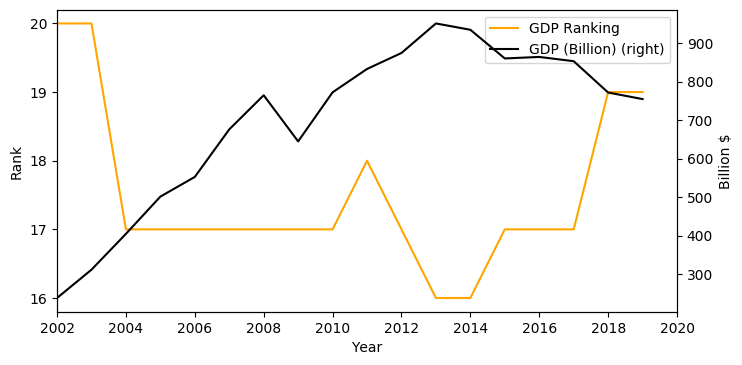

In [161]:
ax = ranking_data.loc[2002:, 'Turkey'].plot(label='GDP Ranking', legend=True, color='orange')
ax.set_yticks(ax.get_yticks()[1::2])
ax.set_ylabel('Rank')
ax2 = gdp_data.loc[2002:, 'Turkey'].plot(secondary_y=True, label="GDP (Billion)", legend=True, color='black')
ax2.set_ylabel('Billion $')
ax.set_xlabel('Year')

In [97]:
countries_sorted_by_gdp = list(ranking_data.loc[2019].sort_values().index)

In [98]:
first_35_country = countries_sorted_by_gdp[:35]
ranking_35 = ranking_data[first_35_country].T

### Let's see how countries changed places between 2002-2019

Text(0.5, 1.0, 'Change in GDP ranking change between 2002-2019')

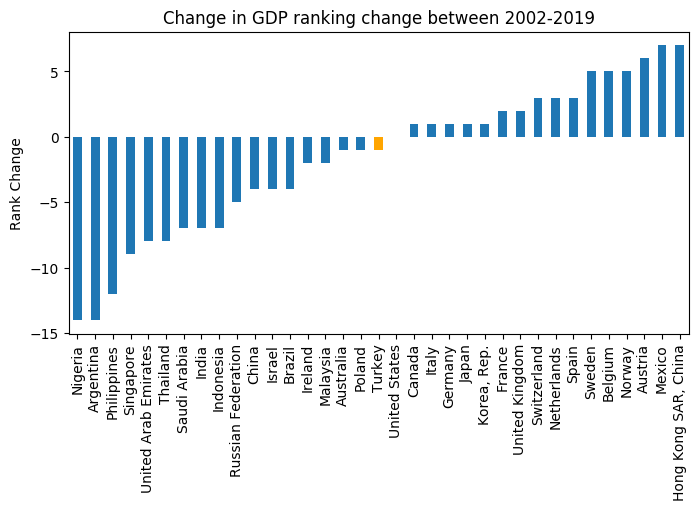

In [145]:
diff = (ranking_35[2019] - ranking_35[2002]).sort_values()
colors=get_color_map('Turkey', diff)
ax = diff.plot(kind='bar', legend=False,color=colors)
ax.set_ylabel('Rank Change')
ax.set_xlabel('')
ax.set_title('Change in GDP ranking change between 2002-2019')

Text(0.5, 1.0, 'Change in GDP ranking between 2008-2019')

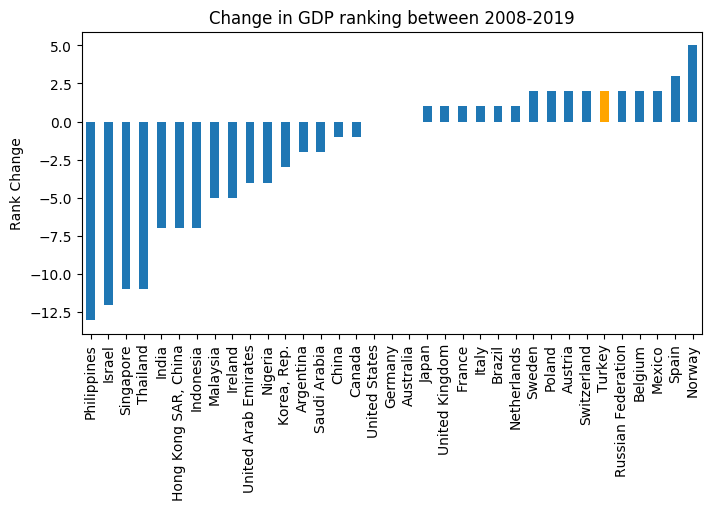

In [135]:
gdp_relative_2019diff = (ranking_35[2019] - ranking_35[2008]).sort_values()
colors=get_color_map('Turkey', diff)
ax = diff.plot(kind='bar', legend=False,color=colors)
ax.set_ylabel('Rank Change')
ax.set_xlabel('')
ax.set_title('Change in GDP ranking between 2008-2019')

In [146]:
diff

Country Name
Nigeria                -14.0
Argentina              -14.0
Philippines            -12.0
Singapore               -9.0
United Arab Emirates    -8.0
Thailand                -8.0
Saudi Arabia            -7.0
India                   -7.0
Indonesia               -7.0
Russian Federation      -5.0
China                   -4.0
Israel                  -4.0
Brazil                  -4.0
Ireland                 -2.0
Malaysia                -2.0
Australia               -1.0
Poland                  -1.0
Turkey                  -1.0
United States            0.0
Canada                   1.0
Italy                    1.0
Germany                  1.0
Japan                    1.0
Korea, Rep.              1.0
France                   2.0
United Kingdom           2.0
Switzerland              3.0
Netherlands              3.0
Spain                    3.0
Sweden                   5.0
Belgium                  5.0
Norway                   5.0
Austria                  6.0
Mexico                   7.0
H

### Let's see how countries performed relative to starting point

In [100]:
gdp_normalized_2002 = (gdp_data.loc[2002:] / gdp_data.loc[2002]) * 100

Text(0.5, 1.0, 'GDP at year 2019 by countries normalized by their GDP at 2002 (100 at 2002) ')

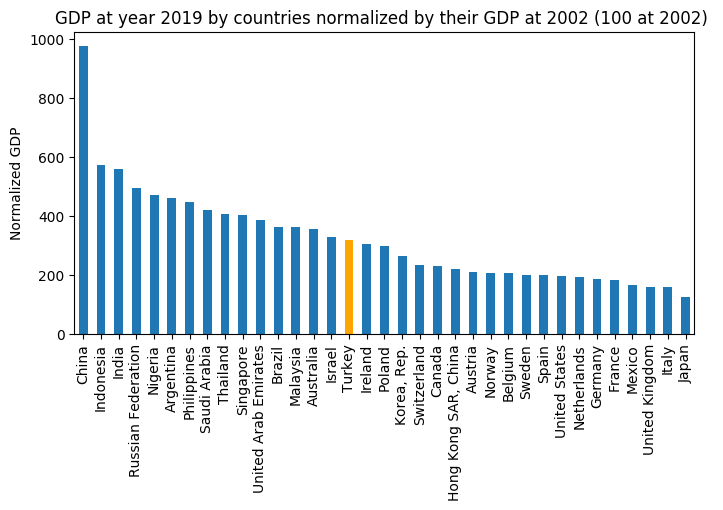

In [150]:
gdp_relative_2019 = gdp_normalized_2002[first_35_country].loc[2019].sort_values(ascending=False)
colors = get_color_map('Turkey', gdp_relative_2019)
ax = gdp_relative_2019.plot(kind='bar', color=colors)
ax.set_ylabel('Normalized GDP')
ax.set_xlabel('')
ax.set_title('GDP at year 2019 by countries normalized by their GDP at 2002 (100 at 2002) ')

In [141]:
gdp_normalized_2008 = (gdp_data.loc[2008:] / gdp_data.loc[2008]) * 100
gdp_relative_2008 = gdp_normalized_2008[first_35_country].loc[2019].sort_values(ascending=False)

Text(0.5, 1.0, 'GDP at year 2019 by countries normalized by their gdp at 2008 (100 at 2008) ')

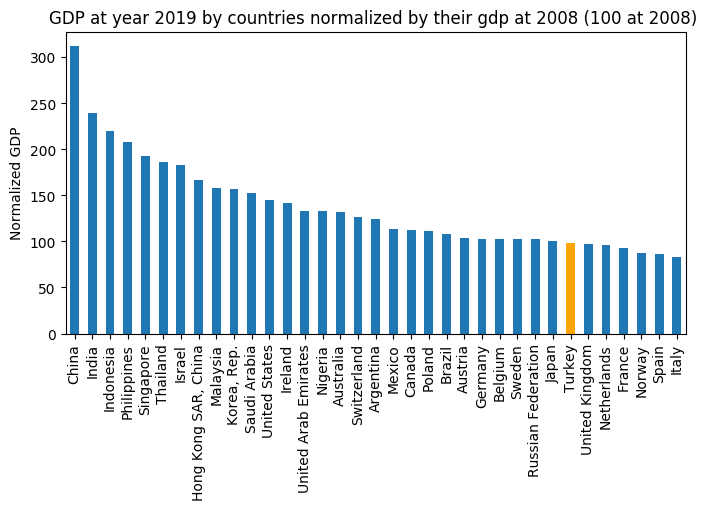

In [151]:
colors = get_color_map('Turkey', gdp_relative_2008)
ax = gdp_relative_2008.plot(kind='bar', color=colors)
ax.set_ylabel('Normalized GDP')
ax.set_xlabel('')
ax.set_title('GDP at year 2019 by countries normalized by their gdp at 2008 (100 at 2008) ')

Text(0.5, 1, 'GDP over years by countries notmalized by their gdp at 2002 (100 at 2002) ')

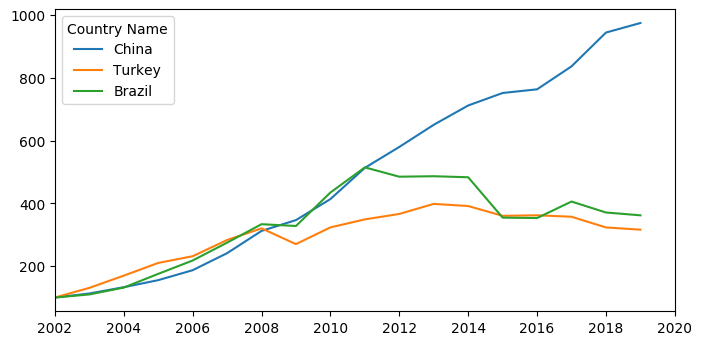

In [134]:
gdp_normalized_2002[['China', 'Turkey', 'Brazil']].plot()
ax.set_ylabel('Normalized GDP')
ax.set_xlabel('')
ax.set_title('GDP over years by countries notmalized by their gdp at 2002 (100 at 2002) ')

Text(0.5, 1.0, 'Nominal GDP of Turkey and Indonesia')

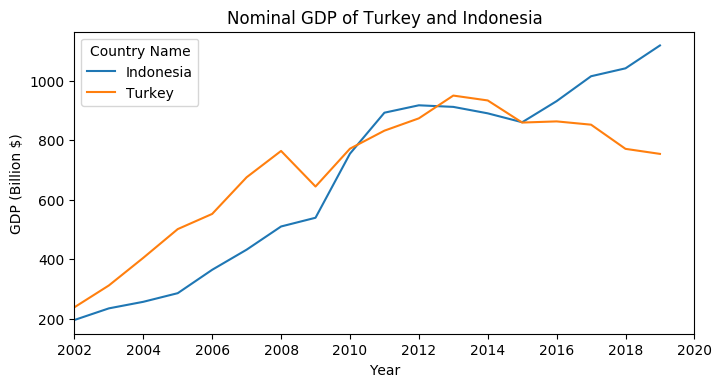

In [165]:
ax = gdp_data[['Indonesia', 'Turkey']].loc[2002:].plot()
ax.set_ylabel('GDP (Billion $)')
ax.set_xlabel('Year')
ax.set_title('Nominal GDP of Turkey and Indonesia')